<a href="https://www.kaggle.com/code/jarvis78/house-prices?scriptVersionId=117902399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**HOUSE PRICE PREDICTION**

![](https://blog.remax.ca/wp-content/uploads/sites/8/2021/03/Canadian-real-estate-Hamilton-Ontario.jpeg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

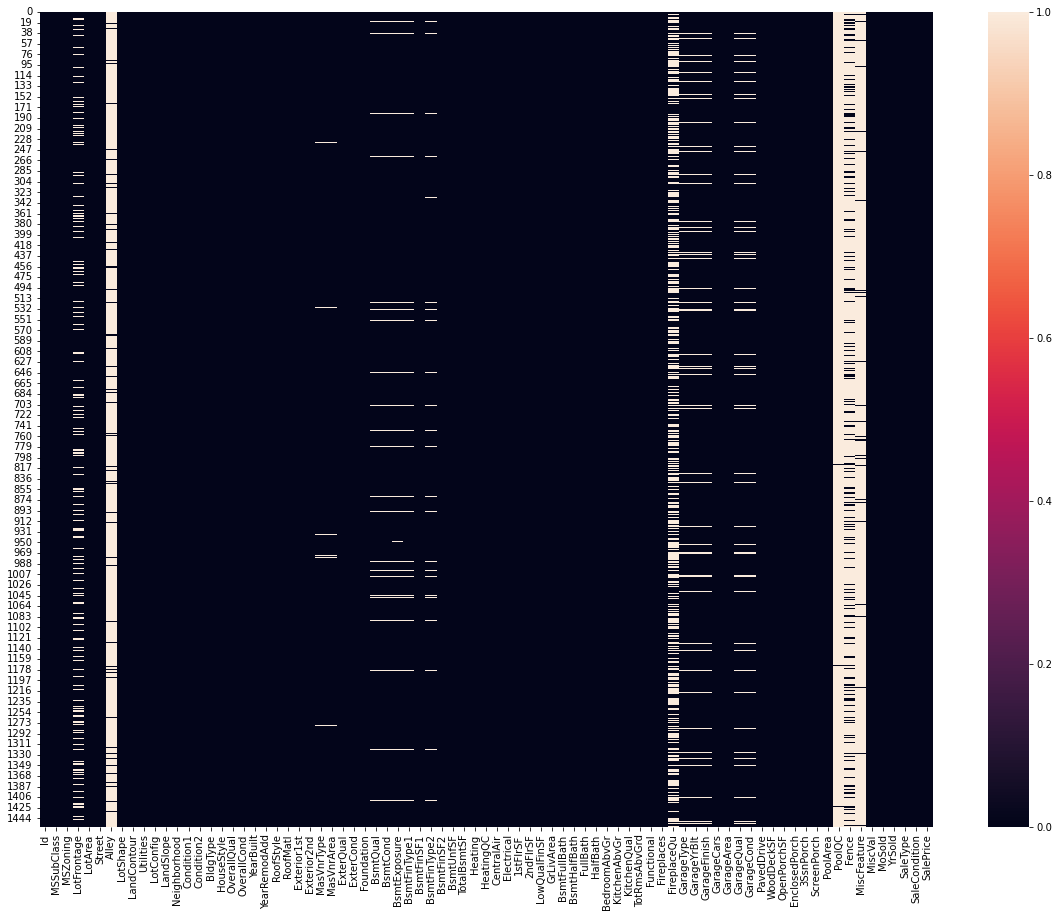

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull())
plt.show()

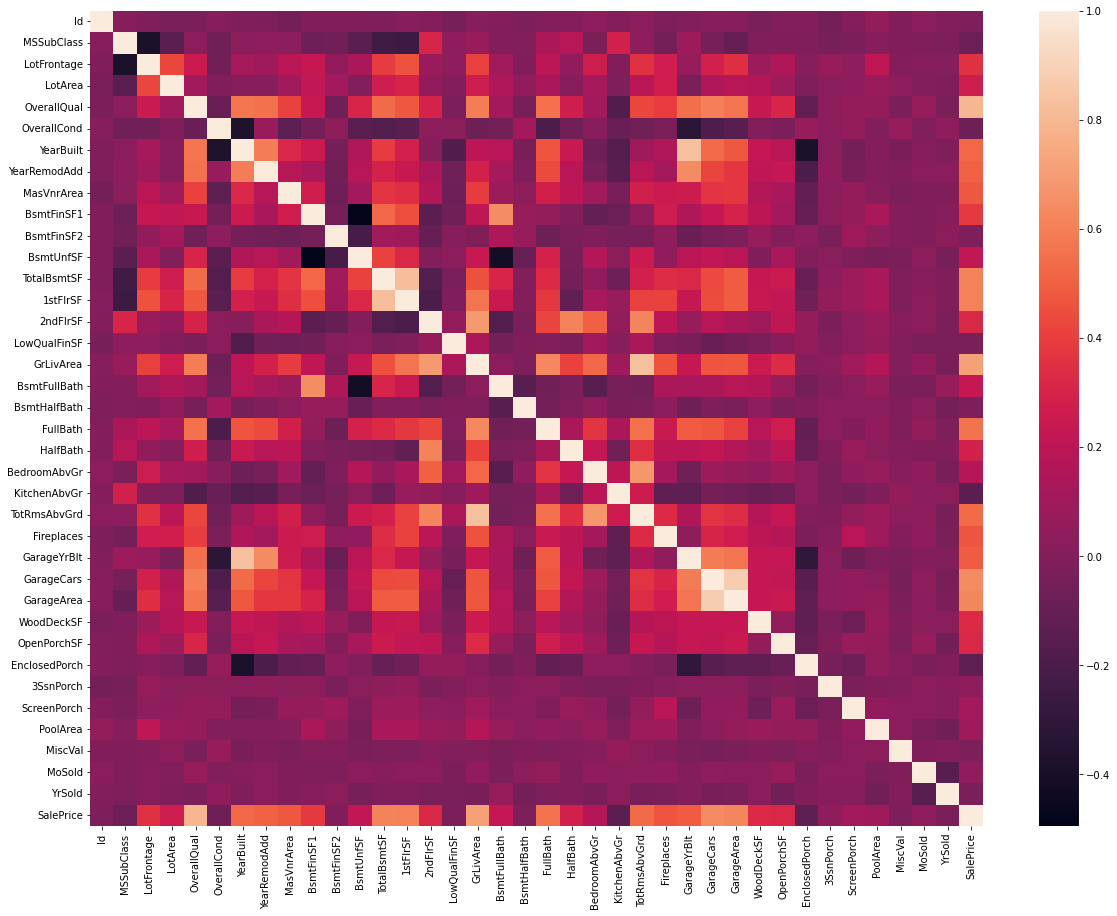

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())
plt.show()


In [8]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50)
                                                 
                    | 
                                                 
                    (df.corr()["SalePrice"]<-0.50)].index)

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

important_cols
df=df[important_cols]

In [9]:
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [10]:
#plt.figure(figsize=(20,15))
#sns.pairplot(df[important_cols])

In [11]:
X=df.drop("SalePrice",axis=1)
y=df["SalePrice"]


In [12]:
X=pd.get_dummies(X,columns=cat_cols)

In [13]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


In [14]:

important_num_cols.remove("SalePrice")
scaler = StandardScaler()
X[important_num_cols]=scaler.fit_transform(X[important_num_cols])

In [15]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [18]:
pred

array([146279.75179158, 281901.93625801, 112045.95480672, 161515.27090027,
       324249.52482549,  44922.38639333, 210950.76358314, 148486.19670107,
        38583.56886176, 127571.75046928, 159130.20523604, 112288.7861192 ,
        71327.23923598, 222498.12649674, 184385.11731587, 130536.34097234,
       216448.70952555, 120309.83933586, 137208.01950475, 218315.87388267,
       177355.00047186, 225570.67987341, 187519.09988685, 120166.49045072,
       214622.30524268, 163835.62493814, 221765.03522439, 100509.32123704,
       187263.23997591, 203375.00552566, 125842.66401234, 246298.43319481,
       266338.2566972 ,  96419.94215315, 258508.91789305, 145057.15703896,
       162284.6278447 , 225124.19728035, 277496.96261879,  85644.48008715,
       132618.32420993, 234216.10409864, 118718.44659273, 346025.72882412,
       129287.47016889, 166030.10346319, 105305.19904565, 116559.57470974,
       371145.47154564, 138686.27406   , 109800.25072997, 221742.11977008,
        99459.48429479, 2

In [19]:
# Residuals
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)
print("mae = ",mae)
print('mse = ',mse)
print("rmse =" ,rmse)
print("R-squared =", r_squared)


mae =  23567.890565943395
mse =  1414931404.6297863
rmse = 37615.57396384889
R-squared = 0.8155317822983865


 **RIDGE REGRESSION**

In [20]:
ridge=Ridge()
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)

# Residuals
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)
print("mae = ",mae)
print('mse = ',mse)
print("rmse =" ,rmse)
print("R-squared =", r_squared)


mae =  23435.50371200822
mse =  1404264216.8595588
rmse = 37473.513537691644
R-squared = 0.8169224907874508


**LASSO REGRESSION**

In [21]:
lasso=Lasso()
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
# Residuals
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)
print("mae = ",mae)
print('mse = ',mse)
print("rmse =" ,rmse)
print("R-squared =", r_squared)



mae =  23560.45808027236
mse =  1414337628.502095
rmse = 37607.680445649596
R-squared = 0.815609194407292


**ELASTICNET REGRESSION**

In [22]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 squared:", r_squared)




MAE: 23560.45808027236
MSE: 1414337628.502095
RMSE: 37607.680445649596
R2 squared: 0.815609194407292


**SVM**

In [23]:
svr=SVR(C=100000)
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 squared:", r_squared)

MAE: 17843.16228084975
MSE: 1132136370.3413324
RMSE: 33647.23421533087
R2 squared: 0.8524004925265739


**POLYNOMIAL REGRESSION**

In [24]:
poly = PolynomialFeatures(degree=2)
X_train_2d=poly.fit_transform(X_train)
X_test_2d=poly.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_2d,y_train)
pred=lr.predict(X_test_2d)
#Residuals
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r_squared = r2_score(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 squared:", r_squared)


MAE: 2382228327828308.5
MSE: 1.5139911544182342e+32
RMSE: 1.230443478758059e+16
R2 squared: -1.9738289005226644e+22
